In [1]:
import findspark
findspark.init()

import pyspark
import pyspark.sql
from pyspark.sql import *
import os.path
from pyspark.sql.functions import desc

from pyspark.sql import dataframe
from pyspark.sql import functions as F
from pyspark.sql.functions import isnan, when, count, col

from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import SQLContext

spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)
import seaborn as sns
import re
import pandas as pd

In [2]:
DATA_DIR = '../data/data_processed/'

In [3]:
conflicts = spark.read.parquet(DATA_DIR+"union_3_cat.parquet")

In [5]:
conflicts.printSchema()

root
 |-- id: long (nullable = true)
 |-- title: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- article_lenght: integer (nullable = true)
 |-- views: long (nullable = true)
 |-- refs_count: long (nullable = true)
 |-- link_count: long (nullable = true)
 |-- death: string (nullable = true)
 |-- end_date: string (nullable = true)
 |-- location: string (nullable = true)



In [14]:
conflicts.select("id","death","end_date","location").show()

+--------+--------------------+--------------------+--------------------+
|      id|               death|            end_date|            location|
+--------+--------------------+--------------------+--------------------+
|50429564|            33+ (+2)|          1 May 2016|   Samawah (Q750679)|
|39900222|                   4|         22 May 2013|Zatloukalova 404/...|
|46935886|                   4|   December 14, 1993|12293 East Iliff ...|
|38247068|At least 67 (at l...|                null|West of [[In Amen...|
|19896366|                  17|     21 October 2008|    Imphal (Q208097)|
| 2234230|8 civilian hostag...|+1975-03-05T00:00...|   Tel Aviv (Q33935)|
| 4538300|                  97|         27 May 1940|Le Paradis villag...|
|12983993|                   3|   September 3, 1984|[[Montreal]], [[Q...|
|10032978| 1 (one perpetrator)|      March 11, 2007|  Casablanca (Q7903)|
|41583832|                 983|{{start date and ...|                null|
|52461344|                  69|     16

In [15]:
# Quantifying null values
# how many rows does the dataframe have?
nConflict=conflicts.count()

conflict_nan = conflicts.select([
    count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in conflicts.columns
]).select("id","death","end_date","location").toPandas()

conflict_percentages_nan = conflict_nan*100/nConflict
conflict_percentages_nan.head()

,id,death,end_date,location
0,0.0,34.331349,12.411266,11.088848


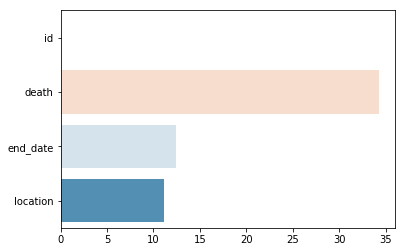

In [17]:
sns.barplot(data=conflict_percentages_nan, palette='RdBu',orient='h')

In [23]:
deaths_pd = conflicts.select("id","title","death").toPandas().set_index('id').fillna(0)

In [38]:
deaths_pd[deaths_pd["death"] == 0]

,title,death
id,,
35990004,Battle of the Nervasos Mountains,0
374424,Dorr Rebellion,0
32217196,Battle of Ocotal,0
40979964,Convoy TS 37,0
32246244,Battle of Vaughan Road,0
12611583,First Battle of Charleston Harbor,0
29065406,Battle of Saltholm,0
12232585,1963 South Vietnamese coup d'état,0
44159505,Karen conflict,0
